<a href="https://colab.research.google.com/github/CyberKnight4269/MNIST-ANN/blob/main/MNIST_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/mnist_test.csv')
print(train.shape, test.shape)

(60000, 785) (10000, 785)


In [ ]:
x_train = train.iloc[:,1:]
y_train = train['label']
x_test = test.iloc[:,1:]
y_test = test['label']
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [ ]:
y_test.value_counts()

,count
label,
1,1135
2,1032
7,1028
3,1010
9,1009
4,982
0,980
8,974
6,958


#Creating the Artificial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
tf.keras.backend.clear_session()

Adding the input layer

In [ ]:
classifier.add(Dense(units=784, activation='relu'))

Adding the first hidden layer

In [ ]:
classifier.add(Dense(units=100, activation='relu'))

Adding the second hidden layer

In [ ]:
classifier.add(Dense(units=50, activation='relu'))

Adding the output layer

In [ ]:
classifier.add(Dense(units=10, activation='softmax'))

In [ ]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Early Stopping

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=5,
)

In [ ]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
model_history = classifier.fit(x_train, y_train, batch_size=100, epochs=600, callbacks=early_stopping, validation_split=0.2)

Epoch 1/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7987 - loss: 4.8507 - val_accuracy: 0.9273 - val_loss: 0.3374
Epoch 2/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9404 - loss: 0.2606 - val_accuracy: 0.9482 - val_loss: 0.2280
Epoch 3/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9594 - loss: 0.1526 - val_accuracy: 0.9457 - val_loss: 0.2178
Epoch 4/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9685 - loss: 0.1141 - val_accuracy: 0.9588 - val_loss: 0.1733
Epoch 5/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9747 - loss: 0.0897 - val_accuracy: 0.9647 - val_loss: 0.1611
Epoch 6/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9777 - loss: 0.0812 - val_accuracy: 0.9525 - val_loss: 0.2202
Epoch 7/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9777 - loss: 0.0762 - val_accuracy: 0.9631 - val_loss: 0.1730
Epoch 8/600
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9800 - loss: 0

#Summarizing history for accuracy

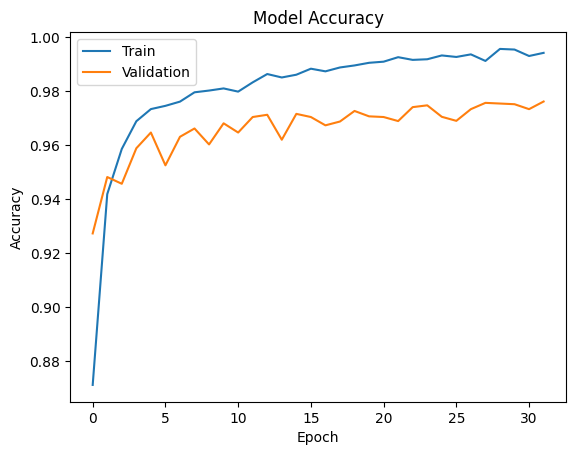

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

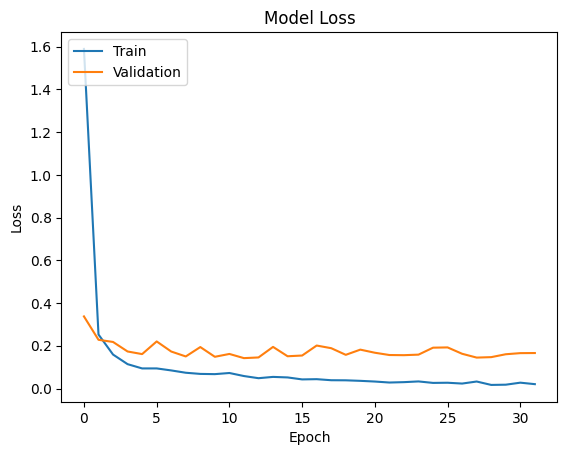

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

#Making the predictions

In [ ]:
predictions = classifier.predict(x_test)
print(predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


In [ ]:
temp = []
for i in predictions:
  temp.append(np.argmax(i))

#Visualizing the predictions

In [ ]:
x_test = np.array(x_test)

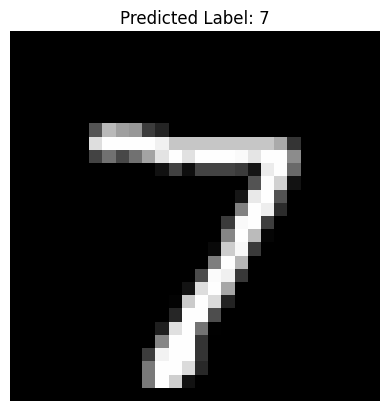

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {temp[0]}")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(temp,y_test)
print(score*100,"%")

97.78999999999999 %
